## This script contains the following:
### Importing your libraries and data
### Subsetting, wrangling, and cleaning time-series data
### Time series analysis: decomposition
### Testing for stationarity
### Stationarizing the Federal Reserve Economic Data

### Importing your libraries and data
#### Before you start this analysis, you'll need a new library you haven't installed before—Quandl. Install Quandl using conda:

conda install quandl

In [2]:
import quandl
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import statsmodels.api as sm # Using .api imports the public access version of statsmodels, which is a library that handles 
# statistical models.
import os
import warnings # This is a library that handles warnings.

warnings.filterwarnings("ignore") # Disable deprecation warnings that could indicate, for instance, a suspended library or 
# feature. These are more relevant to developers and very seldom to analysts.

plt.style.use('fivethirtyeight') # This is a styling option for how your plots will appear. More examples here:
# https://matplotlib.org/3.2.1/tutorials/introductory/customizing.html
# https://matplotlib.org/3.1.0/gallery/style_sheets/fivethirtyeight.html

In [9]:
# Configure API key 

quandl.ApiConfig.api_key = 'yourAPIkey'

In [5]:
df = pd.read_csv(r"C:\Users\charan.lalwani\Documents\cf\Achievement 6\New york citi bikes\Data\Prepared Data\df_machine_learning.csv", index_col = False)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49970 entries, 0 to 49969
Data columns (total 22 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   trip_id                  49970 non-null  object 
 1   bike_id                  49970 non-null  int64  
 2   weekday                  49970 non-null  object 
 3   start_hour               49970 non-null  int64  
 4   start_time               49970 non-null  object 
 5   start_station_id         49970 non-null  int64  
 6   start_station_name       49970 non-null  object 
 7   start_station_latitude   49970 non-null  float64
 8   start_station_longitude  49970 non-null  float64
 9   end_time                 49970 non-null  object 
 10  end_station_id           49970 non-null  int64  
 11  end_station_name         49970 non-null  object 
 12  end_station_latitude     49970 non-null  float64
 13  end_station_longitude    49970 non-null  float64
 14  trip_duration         

In [10]:
#changing the data type of start date
df['start_date'] = pd.to_datetime(df['start_date'])

# Now, the 'start_date' column is of datetime type

In [19]:
#ride counts by day
day_count = df.groupby( df['start_date'].dt.date)['start_date'].count()

In [20]:
day_count

start_date
2013-09-01    1190
2013-09-02    1041
2013-09-03    1538
2013-09-04    1769
2013-09-05    1621
2013-09-06    1720
2013-09-07    1607
2013-09-08    1575
2013-09-09    1665
2013-09-10    1807
2013-09-11    1770
2013-09-12    1525
2013-09-13    1836
2013-09-14    1566
2013-09-15    1609
2013-09-16    1473
2013-09-17    1838
2013-09-18    1841
2013-09-19    1808
2013-09-20    1999
2013-09-21    1598
2013-09-22    1429
2013-09-23    1719
2013-09-24    1878
2013-09-25    1844
2013-09-26    1893
2013-09-27    1752
2013-09-28    1734
2013-09-29    1511
2013-09-30    1814
Name: start_date, dtype: int64

In [21]:
#average trip duration for each day
avg_ride_duration_day = df.groupby('start_date')['trip_duration'].mean()

In [22]:
avg_ride_duration_day

start_date
2013-09-01    1007.178992
2013-09-02     905.522574
2013-09-03     806.680104
2013-09-04     849.778971
2013-09-05     831.691548
2013-09-06     823.945349
2013-09-07     948.012446
2013-09-08     938.584127
2013-09-09     836.801201
2013-09-10     793.867737
2013-09-11     767.462147
2013-09-12     772.995410
2013-09-13     785.875817
2013-09-14     913.457216
2013-09-15     921.869484
2013-09-16     783.902919
2013-09-17     788.960283
2013-09-18     786.564367
2013-09-19     782.302544
2013-09-20     810.741371
2013-09-21     918.165207
2013-09-22     914.491253
2013-09-23     805.823153
2013-09-24     777.173589
2013-09-25     817.700108
2013-09-26     765.229266
2013-09-27     813.859018
2013-09-28     943.891003
2013-09-29     914.151555
2013-09-30     794.257993
Name: trip_duration, dtype: float64

In [23]:
#merging together
result = pd.DataFrame({'date': day_count.index, 'ride_count': day_count.values, 'avg_duration': avg_ride_duration_day.values})

In [25]:
result

,date,ride_count,avg_duration
0,2013-09-01,1190,1007.178992
1,2013-09-02,1041,905.522574
2,2013-09-03,1538,806.680104
3,2013-09-04,1769,849.778971
4,2013-09-05,1621,831.691548
5,2013-09-06,1720,823.945349
6,2013-09-07,1607,948.012446
7,2013-09-08,1575,938.584127
8,2013-09-09,1665,836.801201
9,2013-09-10,1807,793.867737


In [26]:
result.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   date          30 non-null     object 
 1   ride_count    30 non-null     int64  
 2   avg_duration  30 non-null     float64
dtypes: float64(1), int64(1), object(1)
memory usage: 852.0+ bytes


In [27]:
# Set the "Date" column as the index

from datetime import datetime

result['datetime'] = pd.to_datetime(result['date']) # Create a datetime column from "Date.""
result = result.set_index('datetime') # Set the datetime as the index of the dataframe.
result.drop(['date'], axis=1, inplace=True) # Drop the "Date" column.
result.head()

,ride_count,avg_duration
datetime,,
2013-09-01,1190,1007.178992
2013-09-02,1041,905.522574
2013-09-03,1538,806.680104
2013-09-04,1769,849.778971
2013-09-05,1621,831.691548


### The chosen data points, emphasizing the first month of Citi Bike operations, aim to uncover initial trends in ride counts. Including trip duration enhances the analysis by delving into temporal aspects that shape ride patterns.

In [28]:
# Reset index so that you can use the "Date" column as a filter

result_2 = result.reset_index()

In [29]:
result_2.head()

,datetime,ride_count,avg_duration
0,2013-09-01,1190,1007.178992
1,2013-09-02,1041,905.522574
2,2013-09-03,1538,806.680104
3,2013-09-04,1769,849.778971
4,2013-09-05,1621,831.691548


In [30]:
result_3 = result_2[['datetime','ride_count']]

In [31]:
result_3

,datetime,ride_count
0,2013-09-01,1190
1,2013-09-02,1041
2,2013-09-03,1538
3,2013-09-04,1769
4,2013-09-05,1621
5,2013-09-06,1720
6,2013-09-07,1607
7,2013-09-08,1575
8,2013-09-09,1665
9,2013-09-10,1807


In [32]:
# Reset index so that you can use the "Date" column as a filter

result_3 = result.reset_index()

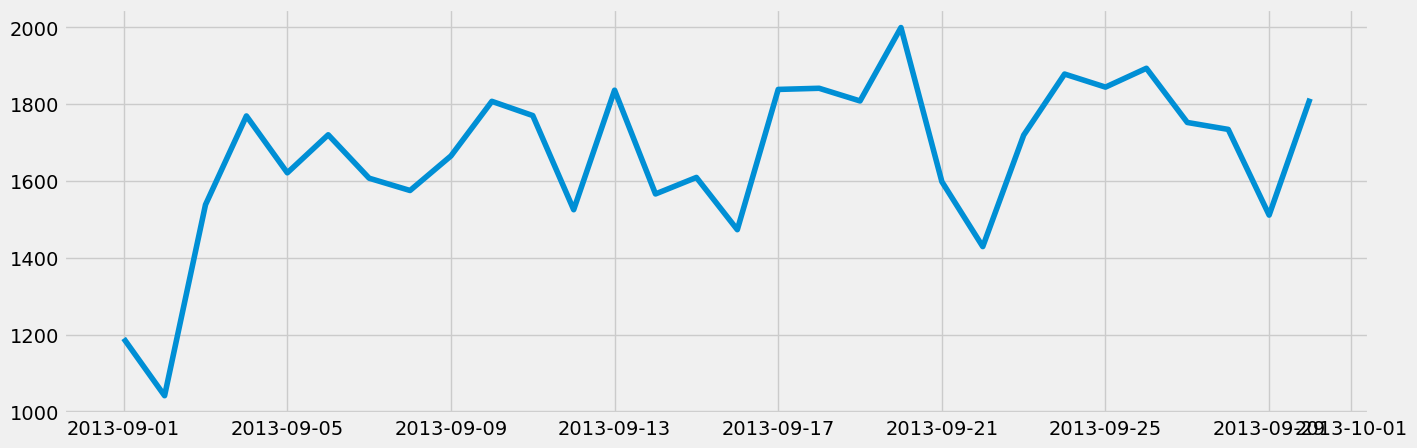

In [33]:
# Plot the new data set

plt.figure(figsize=(15,5), dpi=100)
plt.plot(day_count)

#### It looks like there is some autocorrleation on the ride count depending on the day

### Missing value 

In [34]:
# Check for missing values 

day_count.isnull().sum() 

0

### Time series analysis- Decomposition

In [35]:
result

,ride_count,avg_duration
datetime,,
2013-09-01,1190,1007.178992
2013-09-02,1041,905.522574
2013-09-03,1538,806.680104
2013-09-04,1769,849.778971
2013-09-05,1621,831.691548
2013-09-06,1720,823.945349
2013-09-07,1607,948.012446
2013-09-08,1575,938.584127
2013-09-09,1665,836.801201


In [36]:
# dropping a column
column_to_drop = 'avg_duration'

In [37]:
result = result.drop(column_to_drop, axis=1)

In [38]:
result

,ride_count
datetime,
2013-09-01,1190
2013-09-02,1041
2013-09-03,1538
2013-09-04,1769
2013-09-05,1621
2013-09-06,1720
2013-09-07,1607
2013-09-08,1575
2013-09-09,1665


In [39]:
# Reset index so that you can use the "Date" column as a filter

result_1 = result.reset_index()

In [40]:
result_1

,datetime,ride_count
0,2013-09-01,1190
1,2013-09-02,1041
2,2013-09-03,1538
3,2013-09-04,1769
4,2013-09-05,1621
5,2013-09-06,1720
6,2013-09-07,1607
7,2013-09-08,1575
8,2013-09-09,1665
9,2013-09-10,1807


In [41]:
result_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   datetime    30 non-null     datetime64[ns]
 1   ride_count  30 non-null     int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 612.0 bytes


In [42]:
time_series = result_1['ride_count']

In [43]:
result_1['datetime'] = pd.to_datetime(result_1['datetime'])

In [44]:
result_1.set_index('datetime', inplace=True)

In [45]:
result_1.index.freq = 'D'

In [46]:
time_series = result_1['ride_count']

In [47]:
# Decompose the time series using an additive model
decomposition = sm.tsa.seasonal_decompose(time_series, model='additive')

In [48]:
trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

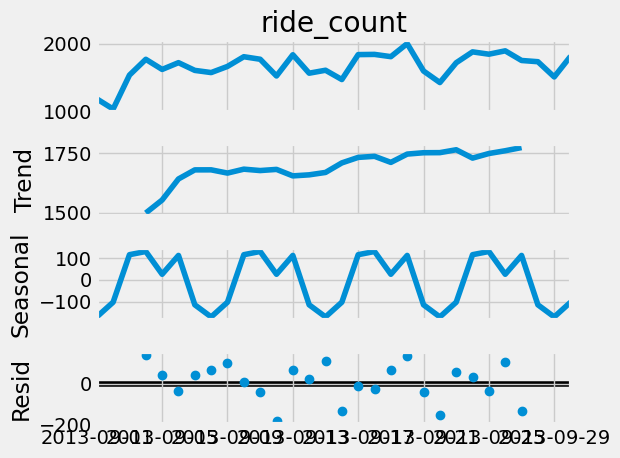

In [49]:
# Plot the separate components

decomposition.plot()
plt.show()

In [50]:
result_1

,ride_count
datetime,
2013-09-01,1190
2013-09-02,1041
2013-09-03,1538
2013-09-04,1769
2013-09-05,1621
2013-09-06,1720
2013-09-07,1607
2013-09-08,1575
2013-09-09,1665


### After applying time series decomposition, the analysis yielded the following observations:

#### The decomposition allowed for a clearer understanding of distinct elements such as trend, seasonality, and noise.
##### An upward trend in ride counts indicated a consistent increase in ridership throughout the month.
###### Recognizable seasonal patterns highlighted periodic fluctuations in the data.
#### The presence of noise underscored random variations, suggesting the potential benefits of smoothing techniques for a more refined analysis.

### Testing for stationarity

In [51]:
# The adfuller() function will import from the model from statsmodels for the test; however, running it will only return 
# an array of numbers. This is why you need to also define a function that prints the correct output from that array.

from statsmodels.tsa.stattools import adfuller # Import the adfuller() function

def dickey_fuller(timeseries): # Define the function
    # Perform the Dickey-Fuller test:
    print ('Dickey-Fuller Stationarity test:')
    test = adfuller(timeseries, autolag='AIC')
    result = pd.Series(test[0:4], index=['Test Statistic','p-value','Number of Lags Used','Number of Observations Used'])
    for key,value in test[4].items():
       result['Critical Value (%s)'%key] = value
    print (result)

# Apply the test using the function on the time series
dickey_fuller(result_1['ride_count'])

Dickey-Fuller Stationarity test:
Test Statistic                 -3.872348
p-value                         0.002248
Number of Lags Used             0.000000
Number of Observations Used    29.000000
Critical Value (1%)            -3.679060
Critical Value (5%)            -2.967882
Critical Value (10%)           -2.623158
dtype: float64


### The Test Statistic is more negative than the critical values at all significance levels, and the p-value is very low (0.002248). This suggests strong evidence against the null hypothesis of non-stationarity. Therefore, based on the Dickey-Fuller test, there is an indication that the time series data is stationary.

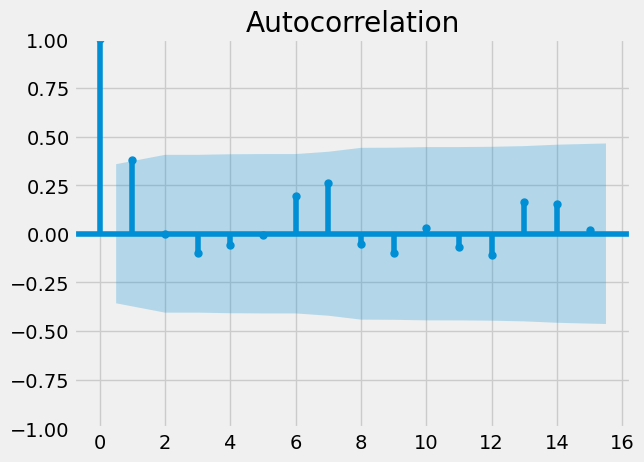

In [52]:
# Check out a plot of autocorrelations

from statsmodels.graphics.tsaplots import plot_acf, plot_pacf # Here, you import the autocorrelation and partial correlation plots

plot_acf(result_1)
plt.show()

In [53]:
df.to_csv(os.path.join(r"C:\Users\charan.lalwani\Documents\cf\Achievement 6\New york citi bikes\Data\Prepared Data" ,"df_time_series.csv"), index=False)